In [29]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

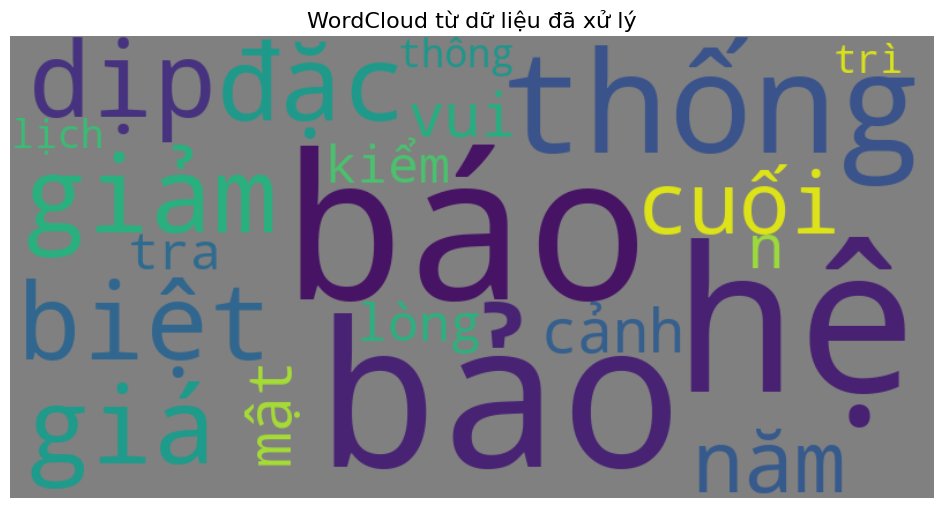

In [6]:
df = pd.read_csv('data/data.csv')

def clean_text(text):
    text = re.sub(r'^Subject:\s*', '', text, flags=re.IGNORECASE)
    text = text.replace('\r',' ').replace('\n',' ')
    text = re.sub(r'[^a-zA -ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂẾưăạảấầẩẫậắằẳẵặẹẻẽềềểếỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵýỷỹ\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+',' ', text).strip()
    return text

df['cleaned'] = df['text'].astype(str).apply(clean_text)
text = ' '.join(df['cleaned'])

wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ dữ liệu đã xử lý', fontsize=16)
plt.show()

In [23]:
data = pd.read_csv('data/Game_of_Thrones_jon_snow_data.csv')
print(data.head())

                                  Names
0    JON: Go on. Father’s watching.\r\n
1             JON: And your mother.\r\n
2  JON: Don’t think too much, Bran.\r\n
3    JON/ROBB: Quick, Bran, faster!\r\n
4   JON (to BRAN): Don’t look away.\r\n


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   1138 non-null   object
dtypes: object(1)
memory usage: 9.0+ KB


In [ ]:
data['Names'] = data['Names'].str.extract(':(.*?)(?=\r\n)') # Lấy ra chuỗi sau dấu : cho đến cuối câu xuống dòng
print(data)

                                                  Names
0                             Go on. Father’s watching.
1                                      And your mother.
2                           Don’t think too much, Bran.
3                                  Quick, Bran, faster!
4                                      Don’t look away.
...                                                 ...
1133    You can come see me, you know, at Castle Black.
1134   You think anyone will dare tell you women are...
1135                           (chuckles) I don't know.
1136                              You have your Needle?
1137   Your Grace. I'm sorry I wasn't there when you...

[1138 rows x 1 columns]


In [27]:
text_data = ''.join(data['Names'])
text_data = text_data.replace("\'", "")
print(text_data)

 Go on. Father’s watching. And your mother. Don’t think too much, Bran. Quick, Bran, faster! Don’t look away. Father will know if you do. You did well. What is it? Now there are five. You want to hold it? Lord Stark? There are five pups. One for each of the Stark children. The direwolf is the sigil of your House. They were meant to have them. I’m not a Stark. Get on. Why’s your mother so dead-set on us getting pretty for the king? Uncle Benjen! Lady Stark thought it might insult the royal family to seat a bastard in their midst. So take me with you when you go back. Father will let me if you ask him, I know he will. I’m ready to swear your oath. I don’t care about that. What’re you doing back there? You’re Tyrion Lannister. The queen’s brother? Lord Eddard Stark is my father. What the hell do you know about being a bastard? I already have one. Of course I have. Weve guarded the Kingdoms for 8 000 years. Soon enough. Its good youve got help.  Impressive.  I have something for you. And i

In [48]:
stopwords = set(STOPWORDS)
wc  = WordCloud(background_color='maroon', max_words=200, stopwords=stopwords)
wc.generate(text_data)

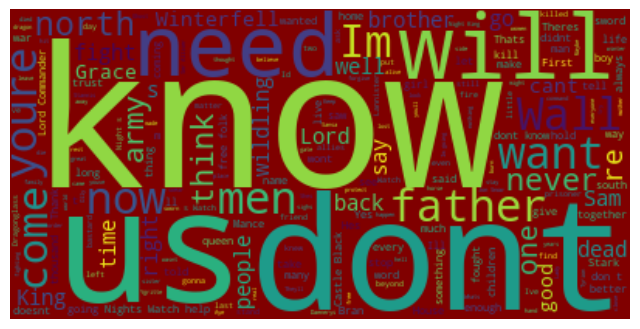

In [49]:
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
import numpy as np
from PIL import Image

In [37]:
img_mask = np.array(Image.open('data/jon-snow.jpg'))
print(img_mask)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


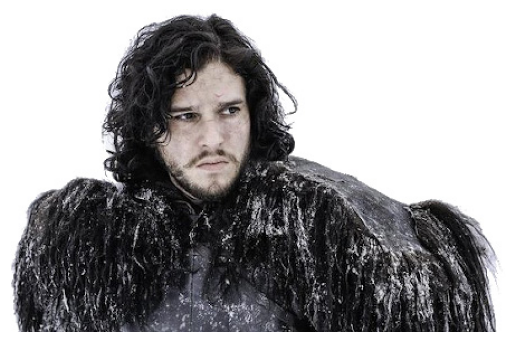

In [40]:
plt.imshow(img_mask)
plt.axis('off')
plt.show()

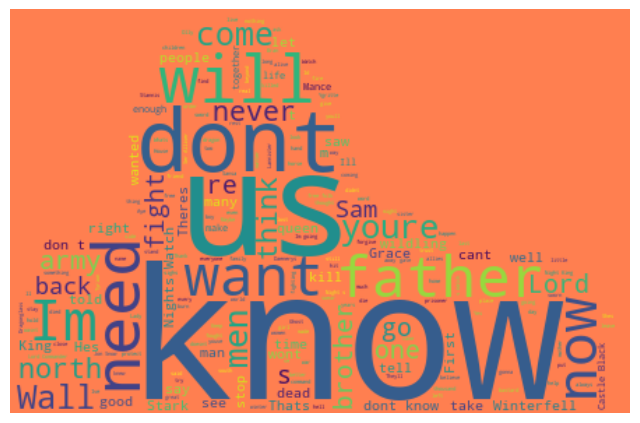

In [45]:
wc_mask = WordCloud(background_color='coral', mask=img_mask, max_words=200, stopwords=stopwords)
wc_mask.generate(text_data)

plt.figure(figsize=(8,10))
plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()